# Task 4: Prediction using Decision Tree  Algorithm :

Author: Jahnavi Gundakaram

# Importing Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Loading the Dataset

In [5]:
iris_data = pd.read_csv('iris.data')

In [6]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
iris_data.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

In [9]:
iris_data.shape

(150, 5)

In [10]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
iris_data.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [13]:
iris_data.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [14]:
iris_data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [16]:
iris_data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Preprocessing the Dataset

In [20]:
iris_data.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [21]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Visualisation

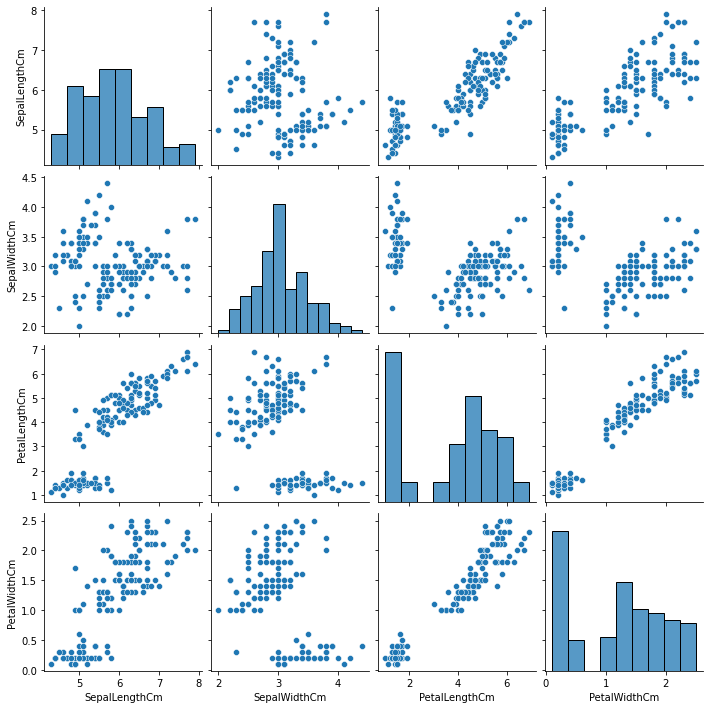

In [24]:
sns.pairplot(iris_data)

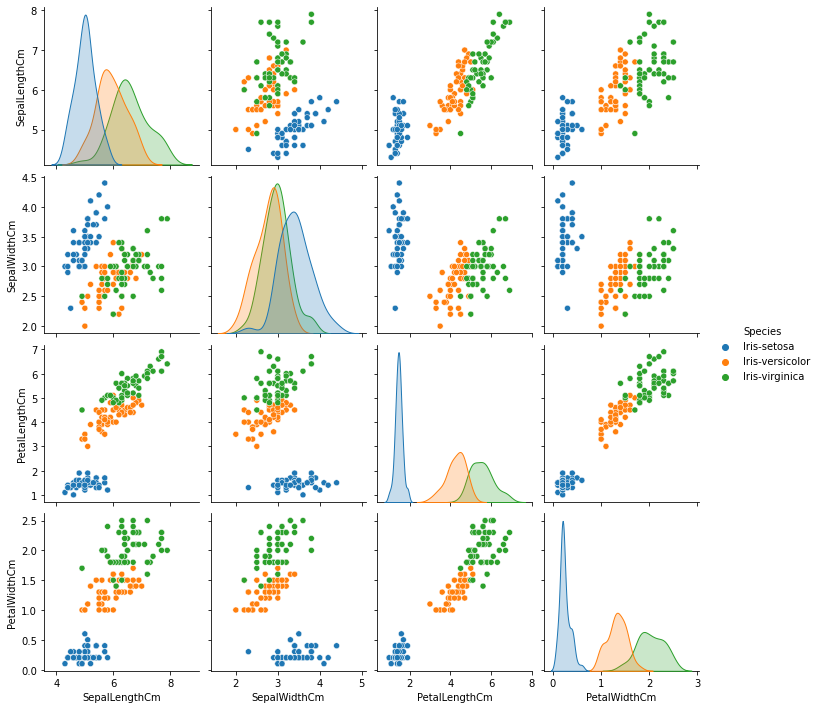

In [26]:
sns.pairplot(iris_data, hue='Species')

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

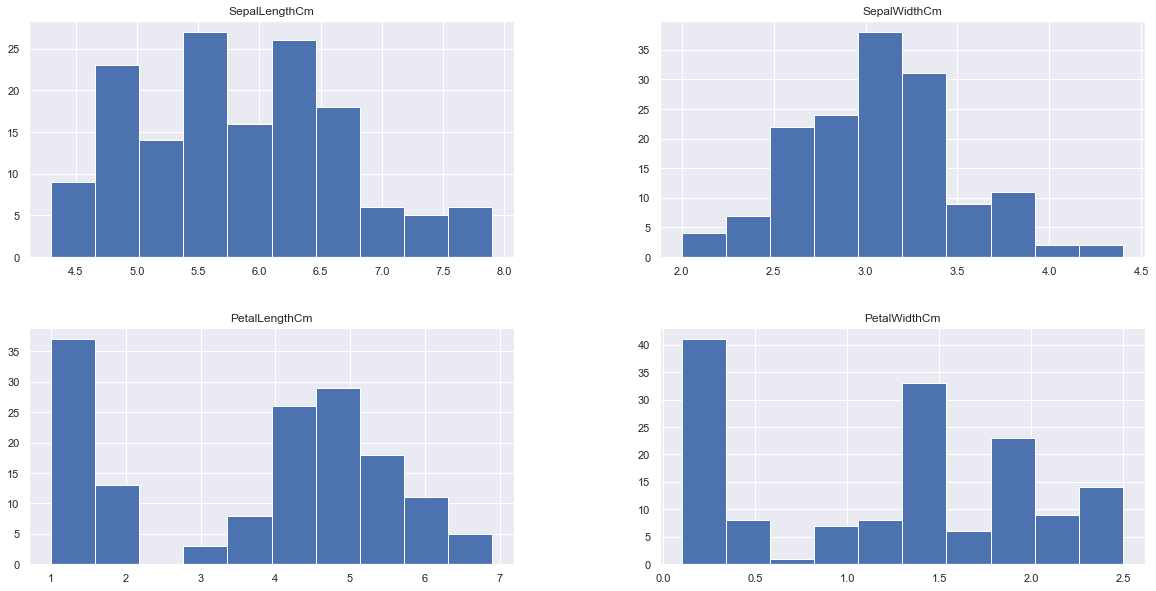

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
iris_data.hist()

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

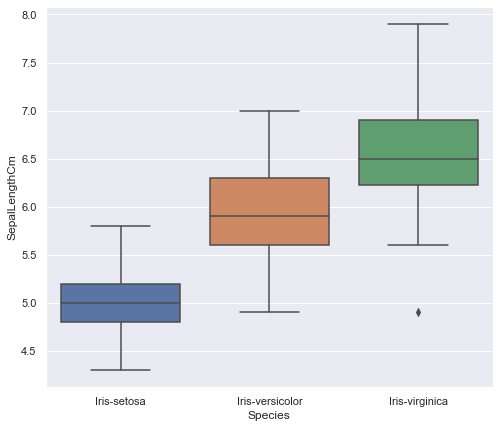

In [29]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species', y='SepalLengthCm',data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

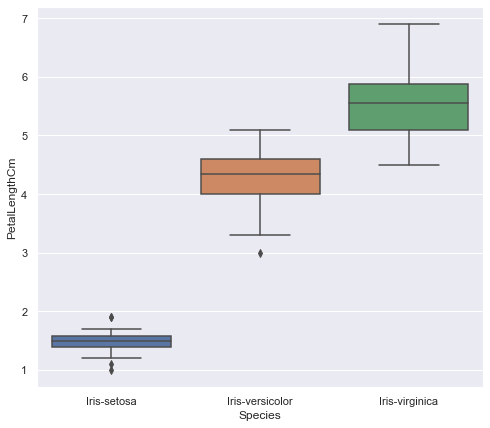

In [30]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species',y='PetalLengthCm',data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

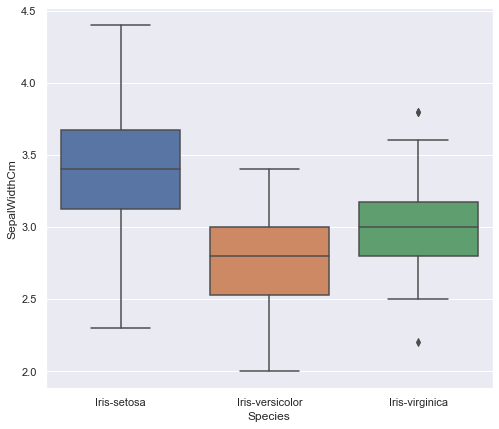

In [32]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species',y='SepalWidthCm',data=iris_data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

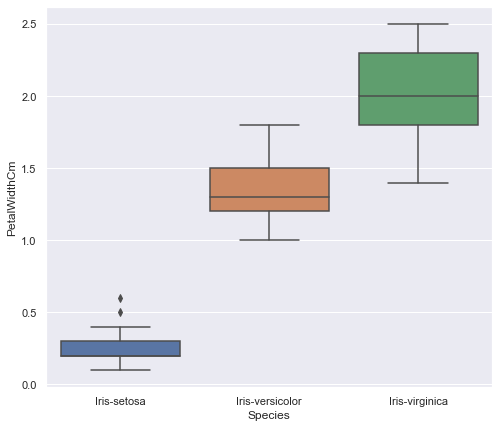

In [33]:
sns.set(rc={'figure.figsize':(8,7)})
sns.boxplot(x='Species',y='PetalWidthCm',data=iris_data)

In [34]:
colors = ['red','green','blue']
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

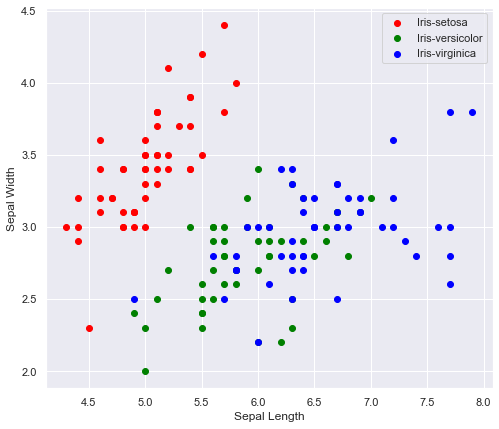

In [35]:
for i in range(3):
    x = iris_data[iris_data['Species']==Species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['SepalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

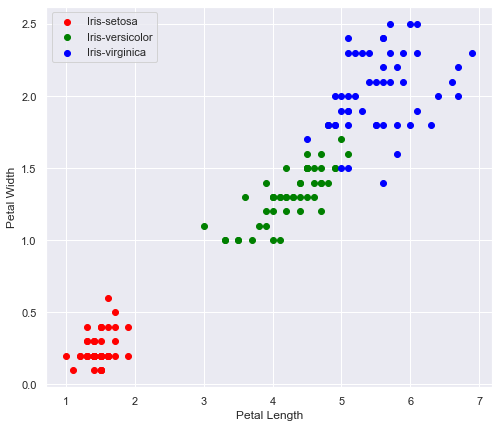

In [36]:
for i in range(3):
    x = iris_data[iris_data['Species']==Species[i]]
    plt.scatter(x=x['PetalLengthCm'], y=x['PetalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

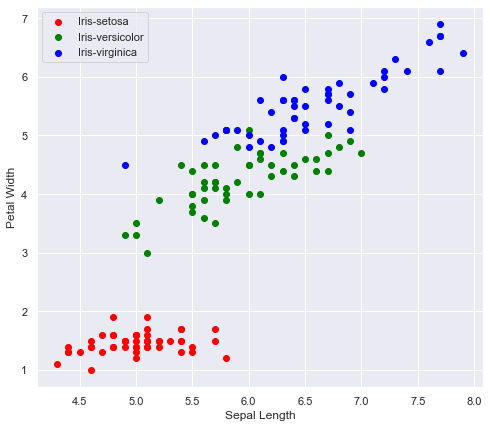

In [37]:
for i in range(3):
    x = iris_data[iris_data['Species']==Species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['PetalLengthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

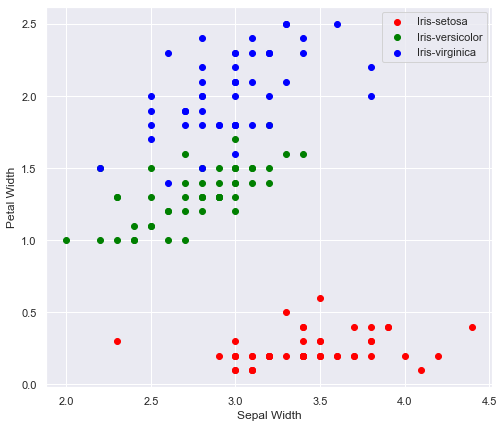

In [38]:
for i in range(3):
    x = iris_data[iris_data['Species']==Species[i]]
    plt.scatter(x=x['SepalWidthCm'], y=x['PetalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

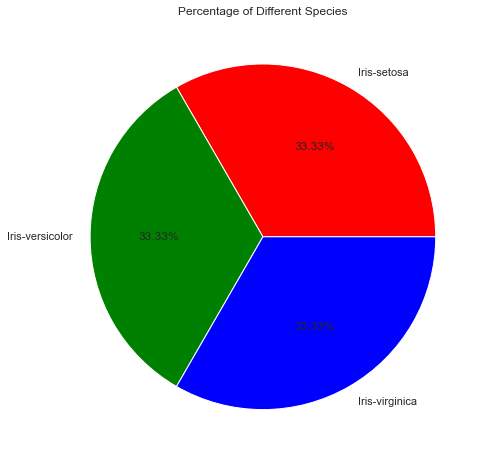

In [41]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
colors = ['red','green','blue']
sp = iris_data['Species'].unique()
vc = iris_data['Species'].value_counts()
ax.pie(vc,labels=sp, autopct='%1.2f%%',colors=colors)
plt.title('Percentage of Different Species')
plt.show()

# Correlation Matrix

In [42]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

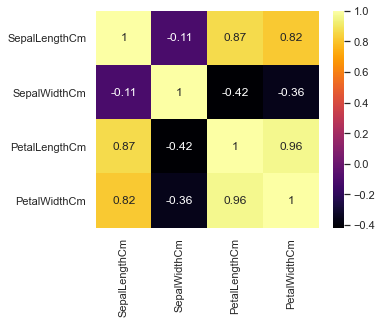

In [44]:
corr = iris_data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax = ax, cmap = 'inferno')

# Prediction using Decision Tree Algorithm

In [45]:
dc = DecisionTreeClassifier()

In [46]:
x = iris_data.drop(['Species'], axis=1)
y = iris_data['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [47]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
print(dc.score(x_test,y_test)*100)

95.55555555555556


In [49]:
y_pred = dc.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 0.9555555555555556


In [51]:
cr = classification_report(y_test, y_pred)
print('Classification Report:',cr)

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [52]:
features = iris_data.columns[:4]
classes = iris_data['Species'].unique().tolist()

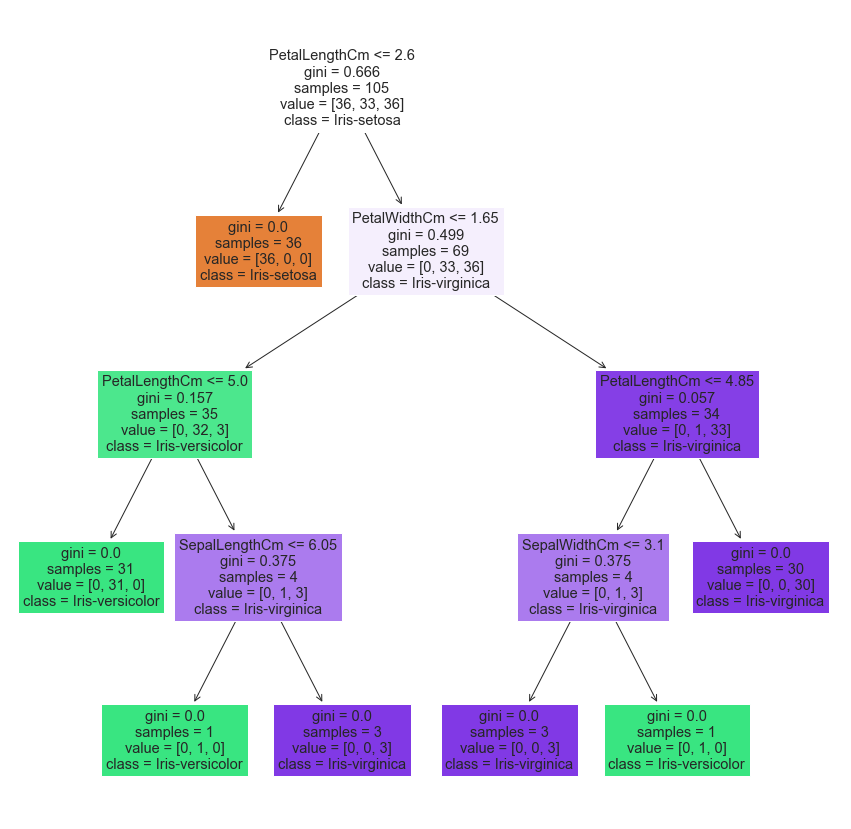

In [54]:
plt.figure(figsize=(15,15))
plot_tree(dc, feature_names = features, class_names = classes, filled = True)
plt.show()